In [1]:
import pandas
import numpy
import matplotlib.pyplot

In [2]:
#take the ~138 files and combine them into one dataframe

years = numpy.arange(1880, 2019, 1)
full = pandas.DataFrame()

for i in range(0, len(years)):
    file = "C:/Users/Librom/Downloads/Program_Final_Project/names/yob" + str(years[i]) + ".txt"
    names = pandas.read_csv(file, sep=",", header = None, names = ["Name", "Sex", "Number"])
    year = numpy.full(len(names), years[i], dtype=int)
    names["Year"] = year
    
    full = full.append(names)

# Q1

In [83]:
def plot_names(*args, sex, begin_year = 1880, end_year = 2018):  
    names = args
    time = range(begin_year, end_year + 1, 1)
    
    #set empty vector/matrix to later store the data
    full_percent = numpy.zeros([len(time), len(names)])
    p = numpy.zeros(len(time))

    #find the name in the range of years and calculate its percent
    for j in range(len(names)):  

        for i in range(begin_year, end_year + 1, 1):
            year_of_name = full[full.iloc[:, 3] == i]
            right_name = year_of_name[year_of_name.iloc[:, 0] == names[j]]
            
            correct_name = right_name[right_name.iloc[:, 1] == sex]

            if correct_name.empty:
                return(print("Error: Invalid inputs"))
            
            total = sum(year_of_name["Number"])
            percent = 100.0*(correct_name.Number / total)
            p[i - begin_year] = percent 
            
            full_percent[:, j] = p
    
    #graph the data
    for k in range(len(names)):
        time_graph = [x + (k*.25) for x in time]
        matplotlib.pyplot.bar(time_graph, full_percent[:, k], width = .25)
        matplotlib.pyplot.ylabel("Percent")
        matplotlib.pyplot.xlabel("Year")
        matplotlib.pyplot.title("Popularity of Name")
        matplotlib.pyplot.legend(names, title = "Names", loc = "upper right") 

    return

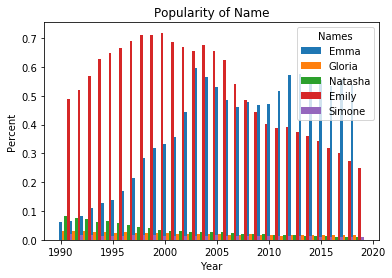

In [110]:
plot_names("Emma", "Gloria", "Natasha", "Emily", "Simone", sex = "F", begin_year = 1990, end_year = 2018)

# Q2

In [96]:
def plot_topn(year, topn, sex):
    #check if inputs are correct
    if sex == 'F' or sex == 'f':
        sex = 'F'
        gender = "Girls"
    elif sex == 'M' or sex == 'm':
        sex = 'M'
        gender = "Boys"
    else:
        return(print("Error: Invalid Input"))
        
    #extract the chosen year, the chosen gender, and the chosen number of names
    chosen_year = full[full.iloc[:, 3] == year]
    chosen_gender = chosen_year[chosen_year.iloc[:, 1] == sex]
    chosen_number = chosen_gender.iloc[0:topn+1, :]
    chosen_number = chosen_number.reset_index(drop = True)
    
    #set empty sets to store the data in
    percent = numpy.zeros(topn)
    total = sum(chosen_year["Number"])
    
    #calculate the percent
    for i in range(0, topn):
        percent[i] = 100.0*(chosen_number.Number[i] / total)

    #graph the data
    matplotlib.pyplot.clf()
    matplotlib.pyplot.barh(chosen_number.Name[0:topn], percent)
    matplotlib.pyplot.annotate(year, xy=(1, 0), xycoords = 'axes fraction', fontsize = 25,
                horizontalalignment = 'right', verticalalignment = 'bottom')
    matplotlib.pyplot.ylim(matplotlib.pyplot.ylim()[::-1])
    matplotlib.pyplot.xlabel('Percent of Newborns with Name')
    matplotlib.pyplot.ylabel('Name')
    matplotlib.pyplot.title('Top ' + str(topn) + ' Most Popular Names for ' + gender + ' in ' + str(year))
        
    return

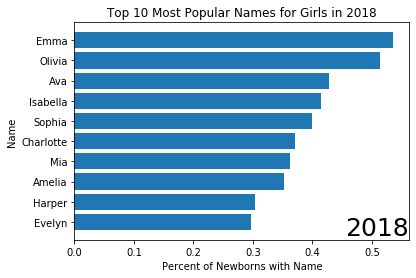

In [108]:
plot_topn(2018, 10, 'F')

# Q3

In [16]:
import matplotlib.animation
from IPython.display import HTML

In [91]:
def name_animate(begin_year, end_year, n, sex, slide_time = .5):
    #define a function that only takes a year for input
    def plot_name(year):
        plot_topn(year, n, sex)

    #create the animation
    fig, ax = matplotlib.pyplot.subplots(figsize=(12, 8))
    animator = matplotlib.animation.FuncAnimation(fig, plot_name, frames = range(begin_year, end_year + 1, 1), interval = slide_time)
    x = HTML(animator.to_jshtml())
    return(x)

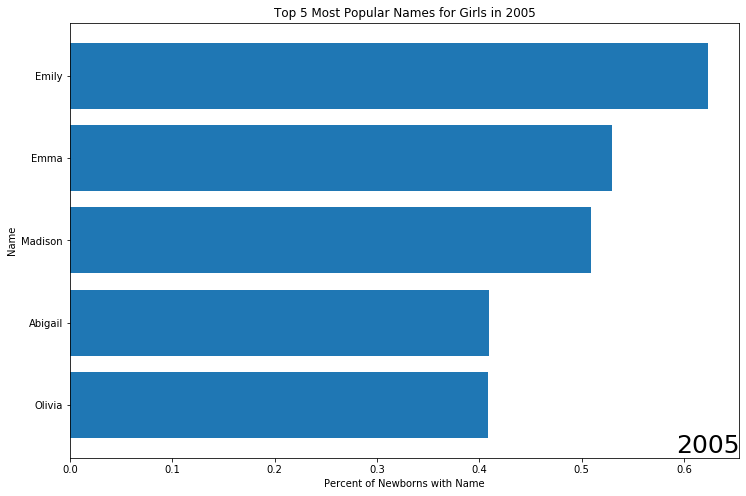

In [93]:
name_animate(2000, 2005, 5, 'F', 200)